# ONLINE RETAIL TRANSACTION ANALYSIS - Data Visualisation

## Data source: https://www.kaggle.com/datasets/abhishekrp1517/online-retail-transactions-dataset 

## Data analysis goals

Analyse online retail transaction data to understand customer behaviour, identify popular products, and optimise pricing and marketing strategies. Provide insights into customer behaviour, popular products, and pricing strategies to improve sales and marketing efforts.

## Context

The "Online Retail Transaction" dataset contains information on customer transactions made through an online retail platform. It includes data on products purchased, quantities, transaction dates and times, prices, customer identifiers, and customer locations. This dataset can be used to analyse customer behaviour and preferences, identify popular products, and optimise pricing and marketing strategies.

---

Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Set style for matplotlib and seaborn

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

Get current working directory

In [3]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Joy\\Desktop\\Code Institute\\IFP\\jupyter_notebooks'

Make the parent of the current directory the new current directory. 

In [4]:
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()

In [5]:
processed_file_path = current_dir+'\\dataset\\processed\\Online_Retail_Processed.csv'
processed_file_path

'c:\\Users\\Joy\\Desktop\\Code Institute\\IFP\\dataset\\processed\\Online_Retail_Processed.csv'

## Load processed data

In [6]:
# Load cleaned dataset
df_cleaned = pd.read_csv(processed_file_path, dtype={'InvoiceNo': str})
# Preview the first few rows
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalTransaction,Year,Month,DayOfWeek,Hour,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,Wednesday,8,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,Wednesday,8,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,Wednesday,8,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,Wednesday,8,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,Wednesday,8,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011,12,Friday,12,2011-12
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,12,Friday,12,2011-12
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12,Friday,12,2011-12
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12,Friday,12,2011-12


# Descriptive Statistics: Basic statistics

In [7]:
total_revenue = df_cleaned['TotalTransaction'].sum()
total_customers = df_cleaned['CustomerID'].nunique()
total_products = df_cleaned['StockCode'].nunique()
total_countries = df_cleaned['Country'].nunique()
avg_order_value = df_cleaned.groupby('InvoiceNo')['TotalTransaction'].sum().mean()

print(f"Total Revenue: {total_revenue:,.2f}")
print(f"Total Customers: {total_customers:,}")
print(f"Total Products: {total_products:,}")
print(f"Countries Served: {total_countries}")
print(f"Average Order Value: {avg_order_value:.2f}")

# Date range
print(f"Date Range: {df_cleaned['InvoiceDate'].min()} to {df_cleaned['InvoiceDate'].max()}")

Total Revenue: 10,642,110.80
Total Customers: 4,338
Total Products: 3,922
Countries Served: 38
Average Order Value: 533.17
Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


# Data Visualisation

## Matplotlib

Monthly Sales Trend

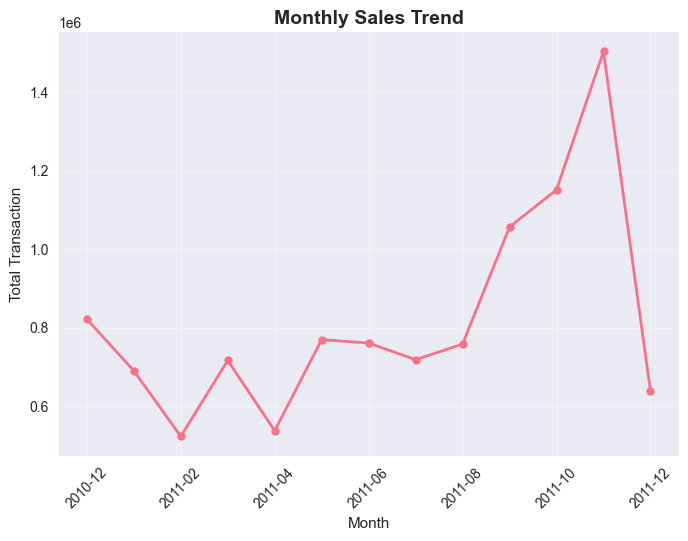

In [8]:
# Group by each month and sum the total transaction value for each month
monthly_sales = df_cleaned.groupby(df_cleaned['YearMonth'])['TotalTransaction'].sum()
monthly_sales.plot(kind='line', marker='o', linewidth=2, markersize=6)
plt.title('Monthly Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Transaction')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

Top 10 Countries by Revenue

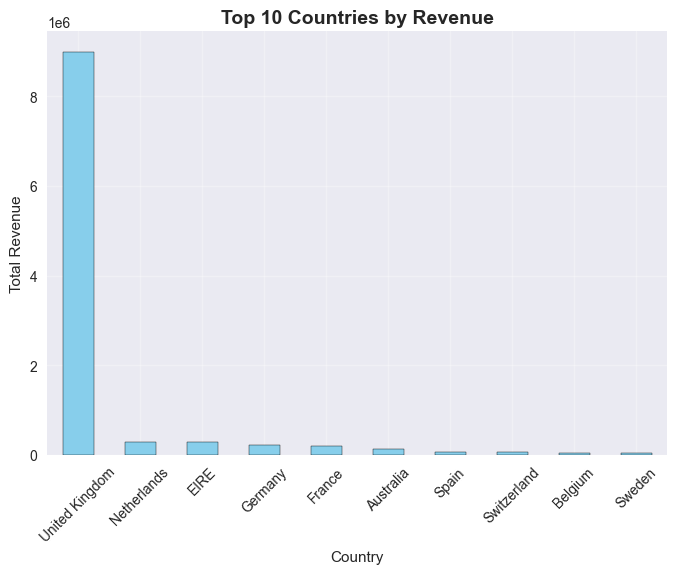

In [9]:
country_sales = df_cleaned.groupby('Country')['TotalTransaction'].sum().sort_values(ascending=False).head(10)
country_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Countries by Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

The UK market generates the majority of revenue due to being the primary market

Top 10 Products by Quantity Sold

Text(0, 0.5, 'Product')

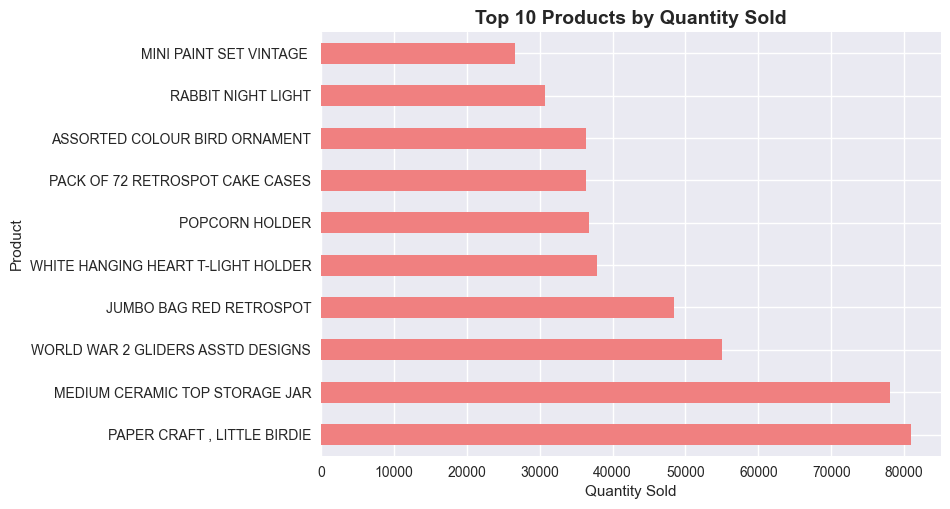

In [10]:
product_quantity = df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
product_quantity.plot(kind='barh', color='lightcoral')
plt.title('Top 10 Products by Quantity Sold', fontsize=14, fontweight='bold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')

Customer Purchase Distribution

Text(0, 0.5, 'Number of Customers')

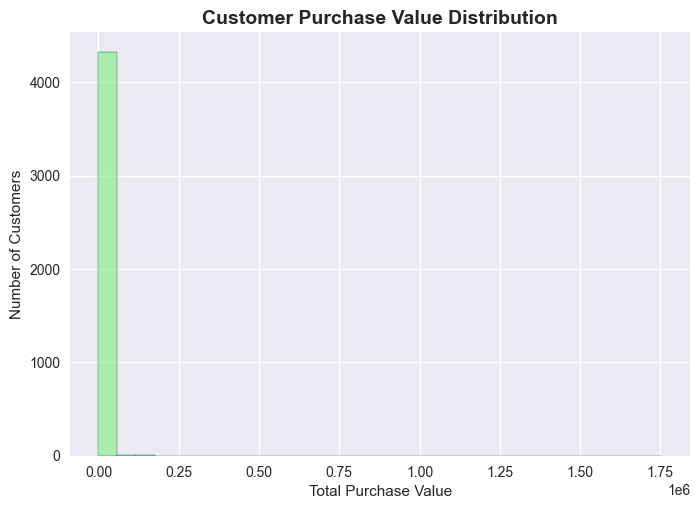

In [11]:
customer_purchases = df_cleaned.groupby('CustomerID')['TotalTransaction'].sum()
plt.hist(customer_purchases, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Customer Purchase Value Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Total Purchase Value')
plt.ylabel('Number of Customers')

Unit Price Distribution

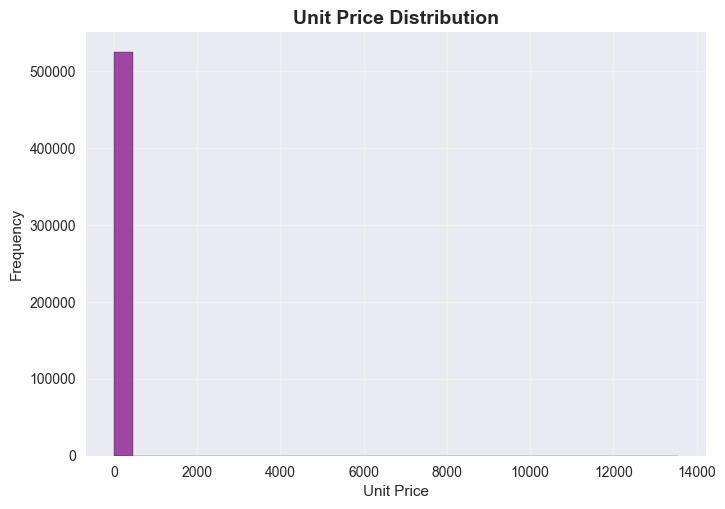

In [12]:
plt.hist(df_cleaned['UnitPrice'], bins=30, color='purple', alpha=0.7, edgecolor='black')
plt.title('Unit Price Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

## Seaborn

Sales by Day of Week

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


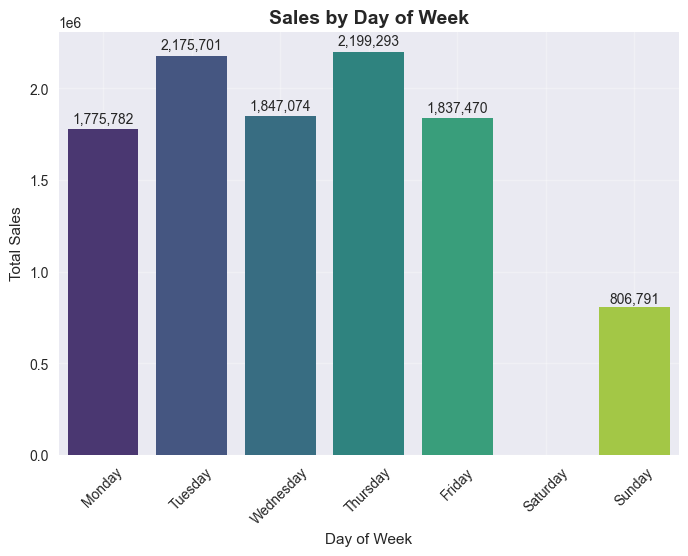

In [13]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = df_cleaned.groupby('DayOfWeek')['TotalTransaction'].sum().reindex(day_order)
sns.barplot(x=daily_sales.index, y=daily_sales.values, hue=daily_sales.index, palette='viridis')
plt.title('Sales by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(daily_sales.values):
    plt.text(i, v + v*0.01, f'{v:,.0f}', ha='center', va='bottom', fontsize=10)

Price vs Quantity Relationship 

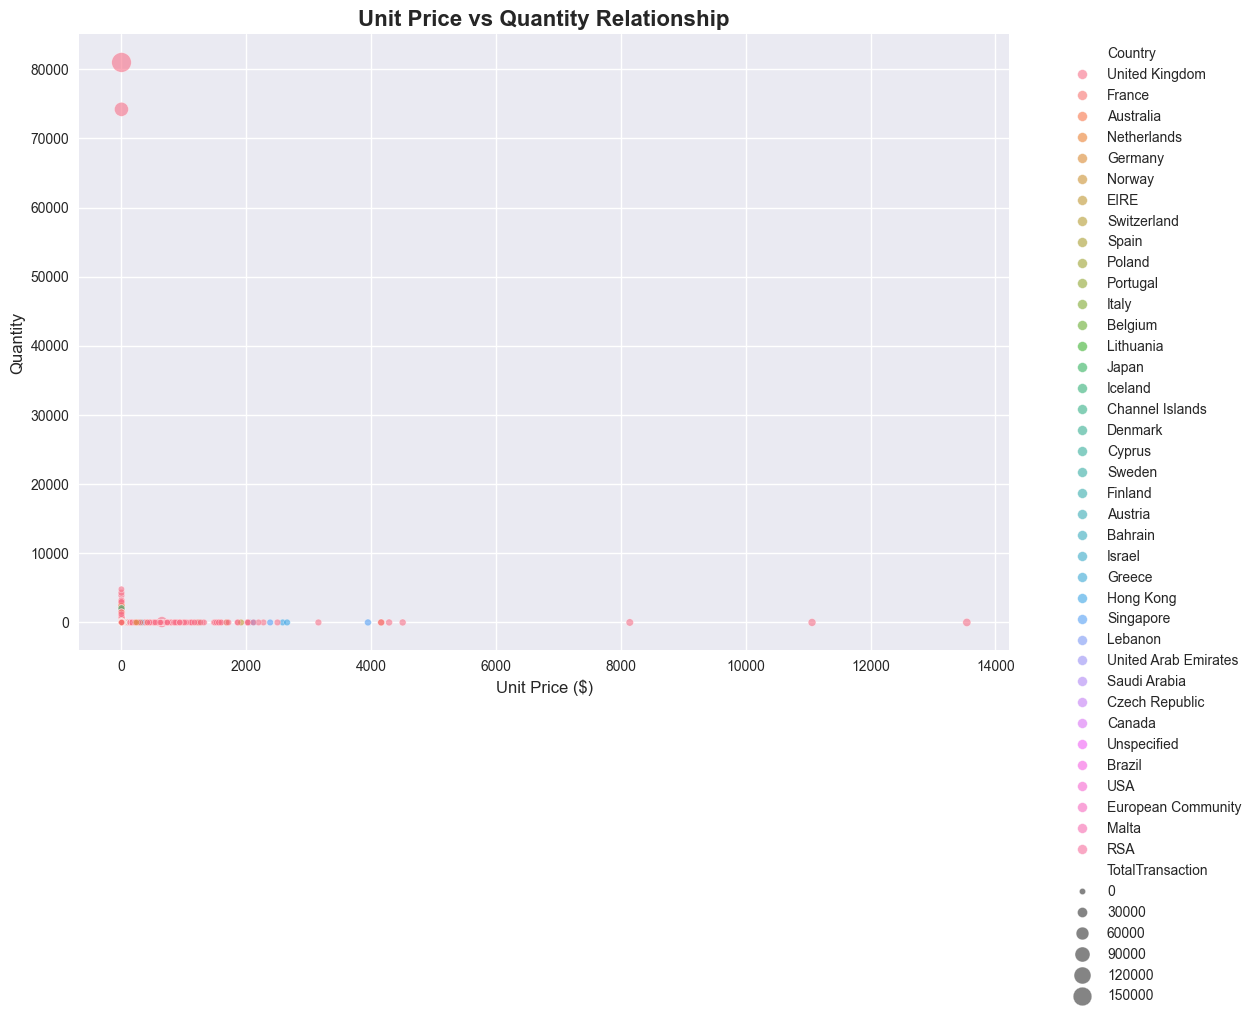

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cleaned, x='UnitPrice', y='Quantity', 
                hue='Country', size='TotalTransaction', sizes=(20, 200), alpha=0.6)
plt.title('Unit Price vs Quantity Relationship', fontsize=16, fontweight='bold')
plt.xlabel('Unit Price ($)', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Higher-priced items have lower quantities sold (inverse relationship)

Product Category Analysis

Text(70.72222222222221, 0.5, 'Price Category')

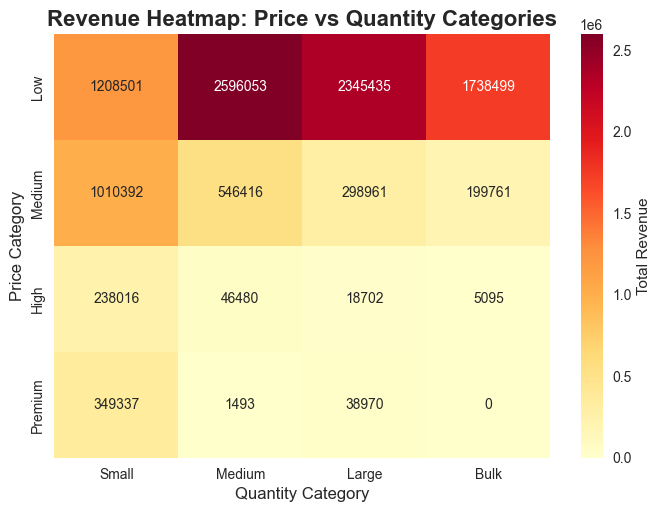

In [15]:
# Create product categories based on price ranges
df_cleaned['PriceCategory'] = pd.cut(df_cleaned['UnitPrice'], 
                            bins=[0, 5, 15, 50, float('inf')], 
                            labels=['Low', 'Medium', 'High', 'Premium'])

# Create quantity categories
df_cleaned['QuantityCategory'] = pd.cut(df_cleaned['Quantity'], 
                               bins=[0, 5, 20, 100, float('inf')], 
                               labels=['Small', 'Medium', 'Large', 'Bulk'])
# Create cross-tabulation
category_matrix = pd.crosstab(df_cleaned['PriceCategory'], df_cleaned['QuantityCategory'], 
                             values=df_cleaned['TotalTransaction'], aggfunc='sum')

sns.heatmap(category_matrix, annot=True, fmt='.0f', cmap='YlOrRd', 
            cbar_kws={'label': 'Total Revenue'})
plt.title('Revenue Heatmap: Price vs Quantity Categories', fontsize=16, fontweight='bold')
plt.xlabel('Quantity Category', fontsize=12)
plt.ylabel('Price Category', fontsize=12)

## CUSTOMER SEGMENTATION ANALYSIS

### RFM Analysis (Recency, Frequency, Monetary)

In [16]:
# Ensure InvoiceDate is in datetime format
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'], errors='coerce')
current_date = df_cleaned['InvoiceDate'].max()
# calculates RFM metrics for customer segmentation:
# Recency: For each customer, finds their most recent purchase date (x.max()), subtracts it from current_date, and gets the number of days since their last purchase.
# Frequency: Counts the number of unique invoices ('nunique') for each customer, representing how often they purchased.
# Monetary: Sums up the total amount spent ('sum') by each customer.
customer_rfm = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalTransaction': 'sum'  # Monetary
}).round(2)

customer_rfm.columns = ['Recency', 'Frequency', 'Monetary']

Create RFM scores

In [17]:
# Assign RFM scores using quintiles (5 groups) for each metric:
# - Recency: Lower value (more recent) gets higher score (5 is best, 1 is worst)
# - Frequency: Higher value (more purchases) gets higher score
# - Monetary: Higher value (more spent) gets higher score
customer_rfm['R_Score'] = pd.qcut(customer_rfm['Recency'], 5, labels=[5,4,3,2,1])
customer_rfm['F_Score'] = pd.qcut(customer_rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
customer_rfm['M_Score'] = pd.qcut(customer_rfm['Monetary'], 5, labels=[1,2,3,4,5])

# Combine scores into a single RFM_Score string for segmentation (e.g., '543')
customer_rfm['RFM_Score'] = customer_rfm['R_Score'].astype(str) + customer_rfm['F_Score'].astype(str) + customer_rfm['M_Score'].astype(str)

print("RFM Analysis Summary:")
print(customer_rfm.describe())

RFM Analysis Summary:
           Recency    Frequency      Monetary
count  4338.000000  4338.000000  4.338000e+03
mean     91.531581     4.601199  2.453230e+03
std     100.018092    22.974719  2.809629e+04
min       0.000000     1.000000  3.750000e+00
25%      17.000000     1.000000  3.064825e+02
50%      50.000000     2.000000  6.701350e+02
75%     141.000000     5.000000  1.660895e+03
max     373.000000  1430.000000  1.755389e+06


## Customer Segments

In [18]:
# Function to assign customer segments based on RFM score
def segment_customers(row):
    # Highest scores: most valuable and engaged customers
    if row['RFM_Score'] in ['555', '554', '544', '545', '454', '455', '445']:
        return 'Champions'
    # High scores: loyal repeat customers
    elif row['RFM_Score'] in ['543', '444', '435', '355', '354', '345', '344', '335']:
        return 'Loyal Customers'
    # Good scores: potential to become loyal
    elif row['RFM_Score'] in ['512', '511', '422', '421', '412', '411', '311']:
        return 'Potential Loyalists'
    # Recent buyers, not yet loyal
    elif row['RFM_Score'] in ['155', '154', '144', '214', '215', '115', '114']:
        return 'New Customers'
    # Promising, but not yet loyal or high value
    elif row['RFM_Score'] in ['155', '254', '245', '253', '252', '243', '242']:
        return 'Promising'
    # Customers who need attention to prevent churn
    elif row['RFM_Score'] in ['331', '321', '231', '241', '251']:
        return 'Need Attention'
    # Customers who are about to become inactive
    elif row['RFM_Score'] in ['155', '132', '231', '241', '251']:
        return 'About to Sleep'
    # At risk of being lost
    elif row['RFM_Score'] in ['155', '142', '135', '125', '115']:
        return 'At Risk'
    # Important customers who are losing engagement
    elif row['RFM_Score'] in ['155', '111', '112', '121', '131', '141', '151']:
        return 'Cannot Lose Them'
    # All other scores: lost customers
    else:
        return 'Lost'

# Apply segmentation function to each customer
customer_rfm['Segment'] = customer_rfm.apply(segment_customers, axis=1)

# Print segment counts for summary
print("\nCustomer Segments:")
segment_counts = customer_rfm['Segment'].value_counts()
print(segment_counts)



Customer Segments:
Segment
Lost                   1948
Champions               840
Cannot Lose Them        487
Loyal Customers         426
Potential Loyalists     272
Need Attention          119
Promising               112
New Customers            60
About to Sleep           56
At Risk                  18
Name: count, dtype: int64


## PLOTLY INTERACTIVE VISUALIZATIONS

### Customer Segments Pie Chart

In [19]:
px.pie(values=segment_counts.values, names=segment_counts.index,
              title='Customer Segmentation Distribution (RFM Analysis)',
              color_discrete_sequence=px.colors.qualitative.Set3)

### 3D RFM Analysis

In [20]:
px.scatter_3d(customer_rfm.reset_index(), x='Recency', y='Frequency', z='Monetary',
                      color='Segment',
                      title='3D RFM Customer Segmentation',
                      hover_data=['CustomerID'],
                      color_discrete_sequence=px.colors.qualitative.Set3)

### Hourly Sales Pattern

In [21]:
hourly_sales = df_cleaned.groupby('Hour')['TotalTransaction'].sum().reset_index()

px.line(
    hourly_sales,
    x='Hour',
    y='TotalTransaction',
    title='Hourly Sales Pattern with Trend Analysis',
    labels={'Hour': 'Hour of Day', 'TotalTransaction': 'Revenue'},
    markers=True,
    color_discrete_sequence=['#1f77b4']
)

## KEY INSIGHTS AND RECOMMENDATIONS

### Key insights

In [24]:
monthly_sales_series = df_cleaned.groupby('YearMonth')['TotalTransaction'].sum()
top_countries = df_cleaned.groupby('Country')['TotalTransaction'].sum().nlargest(10)
top_products = df_cleaned.groupby(['StockCode', 'Description'])['Quantity'].sum().nlargest(20)
hourly_sales_series = df_cleaned.groupby('Hour')['TotalTransaction'].sum()
daily_sales_series = df_cleaned.groupby('DayOfWeek')['TotalTransaction'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
print("🔍 KEY FINDINGS:")
print(f"• Peak sales month: {monthly_sales_series.idxmax()}")
print(f"• Top revenue country: {top_countries.index[0]} (${top_countries.iloc[0]:,.2f})")
print(f"• Most popular product: {top_products.index[0][1]}")
print(f"• Peak sales hour: {hourly_sales_series.idxmax()}:00")
print(f"• Best sales day: {daily_sales_series.idxmax()}")

🔍 KEY FINDINGS:
• Peak sales month: 2011-11
• Top revenue country: United Kingdom ($9,001,744.09)
• Most popular product: PAPER CRAFT , LITTLE BIRDIE
• Peak sales hour: 10:00
• Best sales day: Thursday


### Recommendations

- Focus marketing efforts on UK market (highest revenue)
- Optimize inventory for top-selling products (PAPER CRAFT , LITTLE BIRDIE)
- Implement retention campaigns for at-risk customers
- Schedule campaigns for Thursday around 10:00 for maximum impact
- Develop loyalty programs for Champions and Loyal Customers